# 分析教室規模對於測驗分數的影響 

### Setup CoLab environment

In [ ]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

### Import Library

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from time import time

### Set environment

In [ ]:
np.set_printoptions(precision=2)
pd.set_option('display.float_format', '{:.2f}'.format)

### Load File

In [ ]:
# Load the star dataset
target_excel_path = Path.cwd() / 'drive' / 'MyDrive' / '資料分析案例實作' / 'star' / 'star.xlsx'
star_df = pd.read_excel(target_excel_path).convert_dtypes()

### Understand Dataset
這個資料集我們將用來檢驗教室規模對於測驗分數的影響, 每個樣本都包含以下欄位
1. tmathssk 數學量表分數總和
2. treadssk 閱讀量表分數總和
3. classk   課程類型(regular, regular.with.aide, small.class)
4. totexpk  教師的教學總年資
5. sex      學生性別
6. freelunk 是否符合免費午餐資格
7. race     族裔
8. schidkn  學校評鑑指標名次

In [ ]:
star_df.shape

In [ ]:
star_df.head(3)

### 基本統計 Basic statistics

In [ ]:
star_df.info()

In [ ]:
star_df.describe()

In [ ]:
star_df.describe(include='string')

### Process

#### 處理欄位與列

In [ ]:
# 只留下需要分析的欄位
star_df = star_df[['tmathssk','treadssk','classk','totexpk','schidkn']]
star_df.columns

In [ ]:
# 刪除一個欄位
star_df = star_df.drop('schidkn', axis = 1)
star_df.columns

In [ ]:
# 新增一個欄位是數學跟閱讀分數的加總
star_df['new_column'] = star_df['tmathssk'] + star_df['treadssk']
star_df.head()

In [ ]:
# 更改欄位名稱
star_df = star_df.rename(columns = {'new_column':'ttl_score'})
star_df.columns

#### 排序資料

In [ ]:
# 資料排序, 預設是升冪排序
star_df.sort_values(by=['tmathssk', 'classk']).head()

In [ ]:
# 資料排序, 指定排序方式
star_df.sort_values(by=['tmathssk', 'classk'], ascending=[False, True]).head(20)

#### 篩選資料

In [ ]:
# 依照一個或多個條件式來做資料篩選
# 篩選 classk == small.class 的資料列
# 首先建立篩選器
small_class_mask = (star_df['classk'] == 'small.class')
small_class_mask.head()

In [ ]:
# 利用篩選器執行篩選
star_class_data = star_df[small_class_mask]
star_class_data.shape
star_class_data.head()

In [ ]:
# 篩選 treadssk >= 500 的資料列
# 建立篩選器, 利用篩選器執行篩選
treadssk_lt500_mask = (star_df['treadssk'] >= 500)
star_treadssk_lt500_data = star_df[treadssk_lt500_mask]
star_treadssk_lt500_data.head()

In [ ]:
# 篩選 class == small.class treadssk >= 500 的資料列
# 建立篩選器, 利用篩選器執行篩選
small_class_treadssk_lt500_mask = (star_df['classk'] == 'small.class') & (star_df['treadssk'] >= 500)
small_class_treadssk_lt500_data = star_df[small_class_treadssk_lt500_mask]
small_class_treadssk_lt500_data.shape
small_class_treadssk_lt500_data.head()

#### 聚合資料

In [ ]:
# 依照課程類型分組分群
star_grouped_data = star_df.groupby('classk')
star_grouped_data.count()

In [ ]:
# 算分組內的不同統計值
star_grouped_data['tmathssk'].agg(['sum', 'mean', 'std','min', 'max', 'count'])
star_grouped_data[['tmathssk', 'treadssk']].mean()

#### 合併資料集

In [ ]:
# Load the star dataset
target_excel_path = Path.cwd() / 'drive' / 'MyDrive' / '資料分析案例實作' / 'star' / 'star.xlsx'
star_df = pd.read_excel(target_excel_path).convert_dtypes()

# Load the districts dataset
target_csv_path = Path.cwd() / 'drive' / 'MyDrive' / '資料分析案例實作' / 'star' / 'districts.csv'
district_df = pd.read_csv(target_csv_path).convert_dtypes()

In [ ]:
# Understand districts.csv dataset
print('Shape: ', district_df.shape)
print('Columns', district_df.columns)
district_df.head()

In [ ]:
pd.merge(left=star_df, right=district_df, how='left', on='schidkn').head()

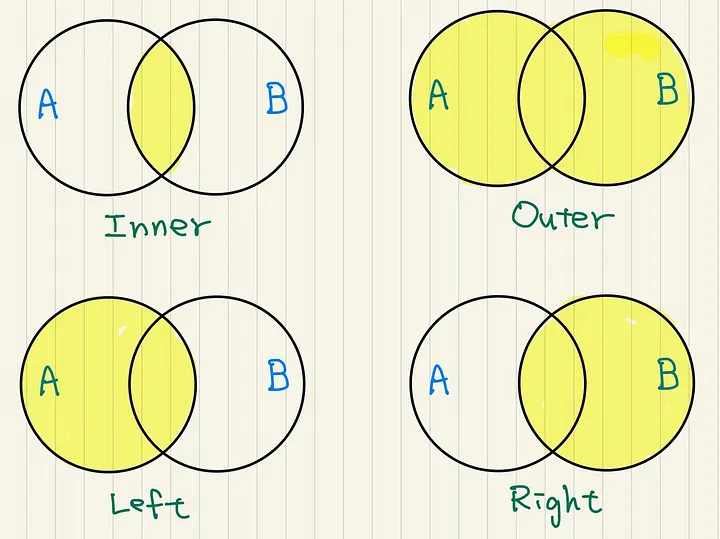

#### 資料視覺化

In [ ]:
# 長條圖 / 計數圖：每一種課程類型(classk)的計數
sns.countplot(x='classk', data=star_df)

In [ ]:
# 直方圖來顯示閱讀分數的分佈
sns.displot(x='treadssk', data=star_df)

In [ ]:
# 自定義直方圖
sns.displot(x='treadssk', data=star_df, bins=25, color='pink')

In [ ]:
#箱形圖
sns.boxplot(x='treadssk', data=star_df)

In [ ]:
#翻轉的箱形圖
sns.boxplot(y='treadssk', data=star_df)

In [ ]:
#每一種課程類型(classk)的閱讀分數的箱形圖
sns.boxplot(x='classk', y='treadssk', data=star_df)

In [ ]:
#數學分數和閱讀分數的散布圖來呈現兩者的關係
sns.scatterplot(x='tmathssk', y='treadssk', data=star_df)

In [ ]:
#數學分數和閱讀分數的散布圖來呈現兩者的關係
sns.scatterplot(x='tmathssk', y='treadssk', data=star_df)
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.title('Math score vs. Reading score')

In [ ]:
# Load 中文字型
import matplotlib
from matplotlib.font_manager import fontManager
target_font_path = Path.cwd() / 'drive' / 'MyDrive' / '資料分析案例實作' / 'star' / 'NotoSansTC-Regular.ttf'
fontManager.addfont(target_font_path)
matplotlib.rc('font',family = 'Noto Sans TC')

In [ ]:
#顯示繁體中文
sns.scatterplot(x='tmathssk', y='treadssk', data=star_df)
plt.xlabel('數學分數')
plt.ylabel('閱讀分數')
plt.title('數學分數 vs. 閱讀分數')